## Bivariate Analysis

StateHoliday and Sales

In [ ]:
import numpy as np
import pandas as pd
import sys, os
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Assuming the file is in a folder named 'data' inside 'My Drive'
file_path = '/content/drive/My Drive/data/merged_store.csv'

# Load the file into a DataFrame
df = pd.read_csv(file_path)
df

<ipython-input-3-a2e76527c0c8>:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionBeforeStoreOpened,PromoInterval0,PromoInterval1,PromoInterval2,PromoInterval3
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,...,2008,0,0,0,"0,0,0,0",0,0,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,...,2007,1,13,2010,"Jan,Apr,Jul,Oct",0,1,4,7,10
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,...,2006,1,14,2011,"Jan,Apr,Jul,Oct",0,1,4,7,10
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,...,2009,0,0,0,"0,0,0,0",0,0,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,...,2015,0,0,0,"0,0,0,0",0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,2013,...,2014,1,31,2013,"Jan,Apr,Jul,Oct",0,1,4,7,10
1017205,1112,2,2013-01-01,0,0,0,0,a,1,2013,...,2006,0,0,0,"0,0,0,0",0,0,0,0,0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,2013,...,1900,0,0,0,"0,0,0,0",1,0,0,0,0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,2013,...,1900,0,0,0,"0,0,0,0",1,0,0,0,0


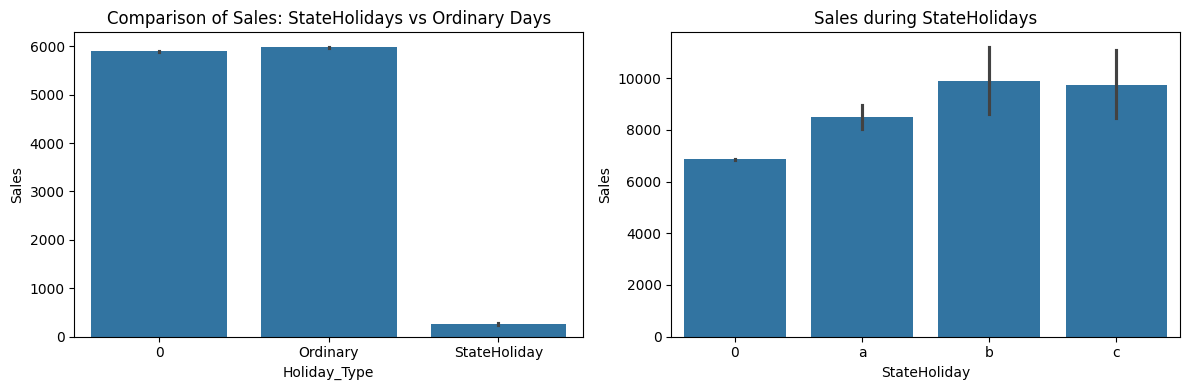

In [ ]:
# Create the figure and subplots
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(12, 4))

# Prepare data for the first subplot
# Melting the DataFrame to compare Sales during StateHolidays and Ordinary Days
df['Holiday_Type'] = df['StateHoliday'].replace({'0': 'Ordinary', 'a': 'StateHoliday', 'b': 'StateHoliday', 'c': 'StateHoliday'})
sns.barplot(
    x='Holiday_Type',
    y='Sales',
    data=df,
    ax=axis1
)
axis1.set_title('Comparison of Sales: StateHolidays vs Ordinary Days')

# Second subplot: Sales during StateHolidays only
mask = (df["StateHoliday"] != "0") & (df["Sales"] > 0)
sns.barplot(
    x='StateHoliday',
    y='Sales',
    data=df[mask],
    ax=axis2
)
axis2.set_title('Sales during StateHolidays')

# Display the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

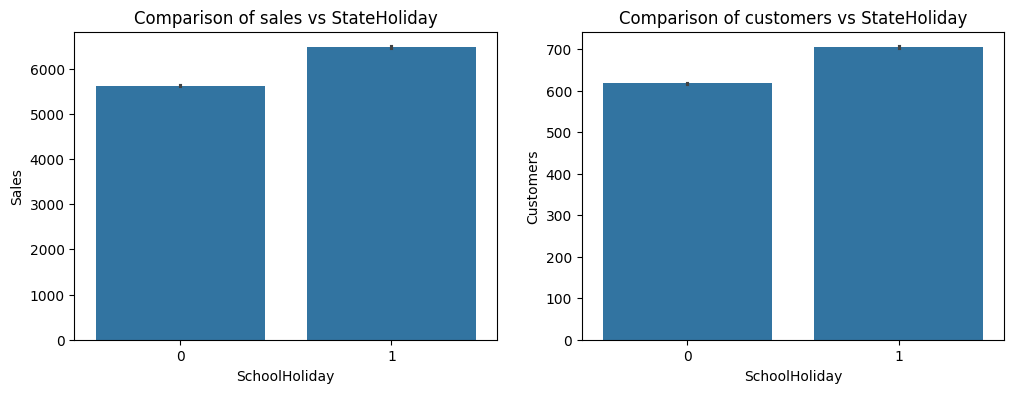

In [ ]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(12,4))

sns.barplot(x='SchoolHoliday', y='Sales', data=df, ax=axis1).set_title('Comparison of sales vs StateHoliday')
sns.barplot(x='SchoolHoliday', y='Customers', data=df, ax=axis2).set_title('Comparison of customers vs StateHoliday')
plt.show()

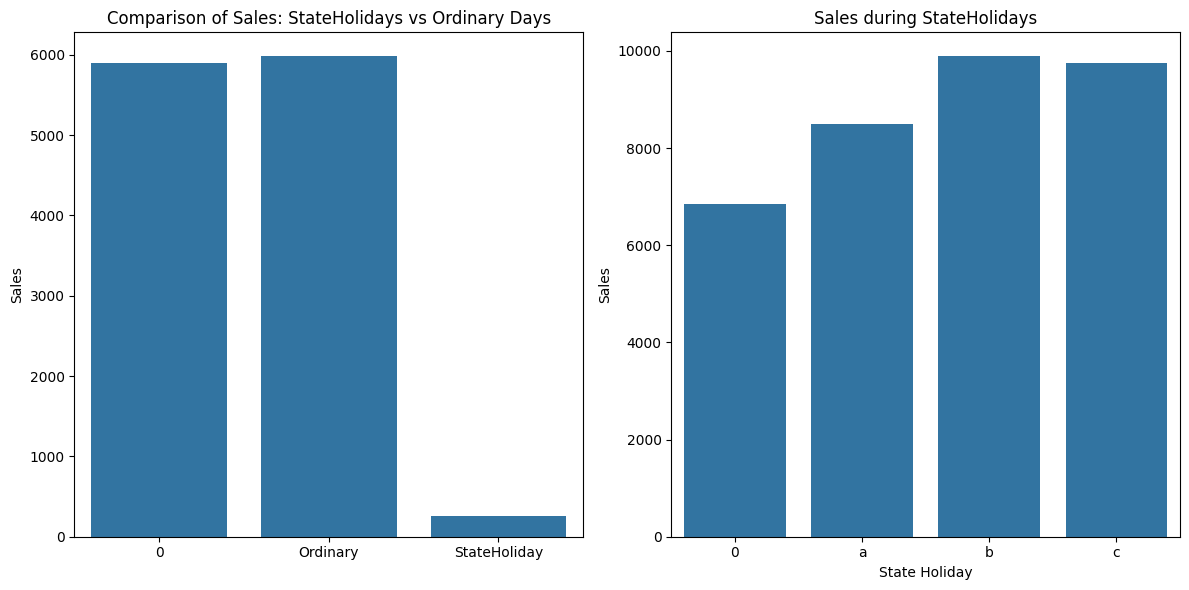

In [ ]:
# Create the figure and subplots
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(12, 6))

# Prepare data for the first subplot
# Create a new column for grouping
df['Holiday_Type'] = df['StateHoliday'].replace({'0': 'Ordinary', 'a': 'StateHoliday', 'b': 'StateHoliday', 'c': 'StateHoliday'})

# First subplot: Comparison of sales during StateHolidays and ordinary days
sns.barplot(
    x='Holiday_Type',
    y='Sales',
    data=df,
    ax=axis1,
    errorbar=None  # Disable error bars
)
axis1.set_title('Comparison of Sales: StateHolidays vs Ordinary Days')
axis1.set_ylabel('Sales')
axis1.set_xlabel('')

# Prepare data for the second subplot
# Filter the data for StateHolidays only
mask = (df["StateHoliday"] != "0") & (df["Sales"] > 0)
sns.barplot(
    x='StateHoliday',
    y='Sales',
    data=df[mask],
    ax=axis2,
    errorbar=None  # Disable error bars
)
axis2.set_title('Sales during StateHolidays')
axis2.set_ylabel('Sales')
axis2.set_xlabel('State Holiday')

# Display the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

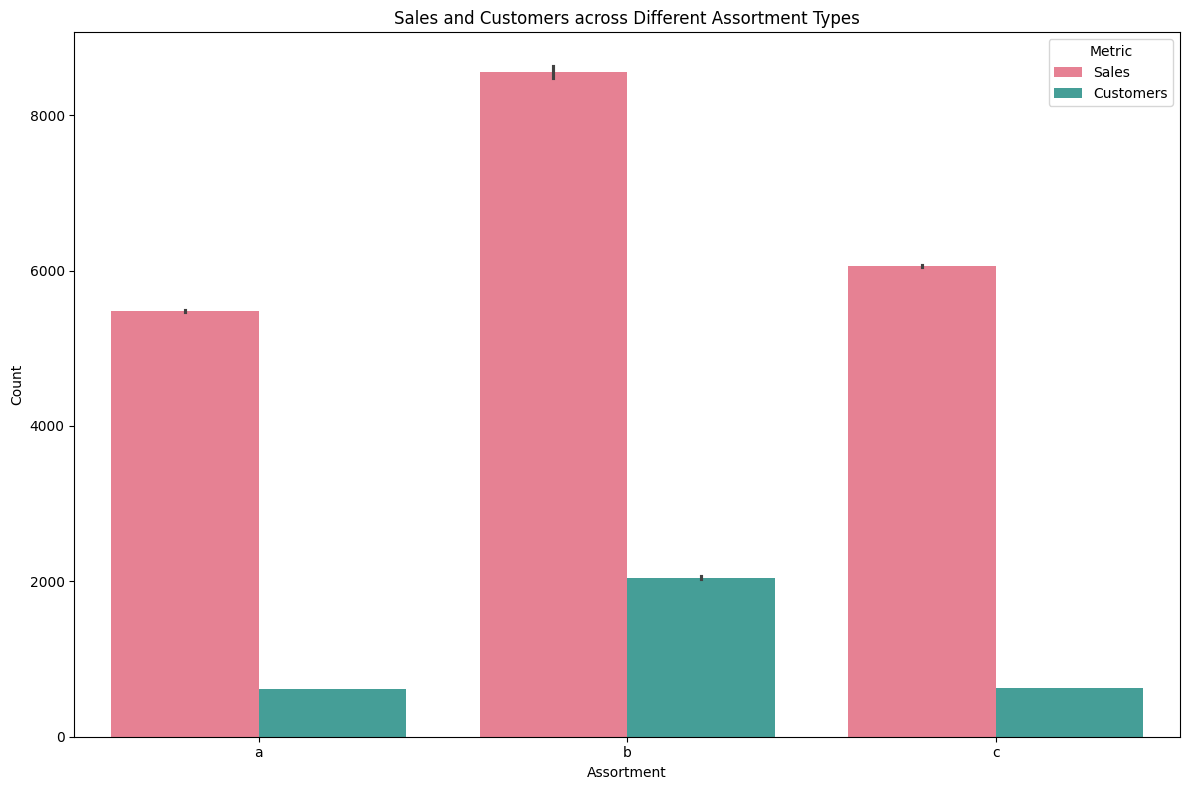

In [ ]:
# Create the figure
fig, ax = plt.subplots(figsize=(12, 8))

# Melt the DataFrame to have a long format for grouped bar plots
melted_df = df.melt(id_vars='Assortment', value_vars=['Sales', 'Customers'], var_name='Metric', value_name='Value')

# Create the grouped barplot
sns.barplot(
    x='Assortment',
    y='Value',
    hue='Metric',  # Differentiate between Sales and Customers
    data=melted_df,
    palette='husl',
    order=['a', 'b', 'c'],
    ax=ax
)

# Set titles and labels
ax.set_title('Sales and Customers across Different Assortment Types')
ax.set_xlabel('Assortment')
ax.set_ylabel('Count')
plt.legend(title='Metric')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

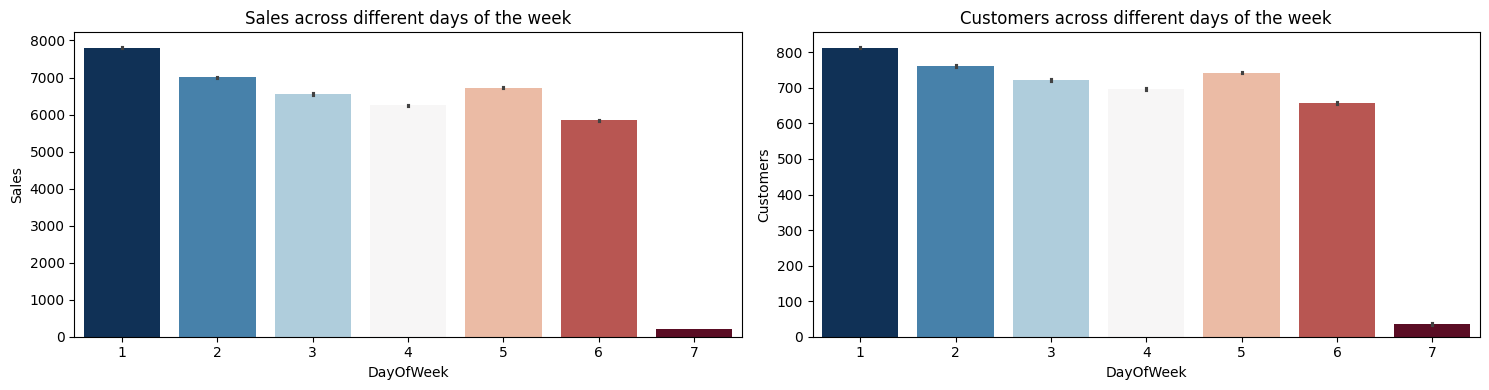

In [ ]:
# Create the figure and subplots
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(15, 4))

# First subplot: Sales across different days of the week
sns.barplot(
    x='DayOfWeek',
    y='Sales',
    hue='DayOfWeek',  # Assign hue to DayOfWeek
    data=df,
    palette='RdBu_r',
    ax=axis1,
    legend=False  # Disable legend
).set_title('Sales across different days of the week')

# Second subplot: Customers across different days of the week
sns.barplot(
    x='DayOfWeek',
    y='Customers',
    hue='DayOfWeek',  # Assign hue to DayOfWeek
    data=df,
    palette='RdBu_r',
    ax=axis2,
    legend=False  # Disable legend
).set_title('Customers across different days of the week')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

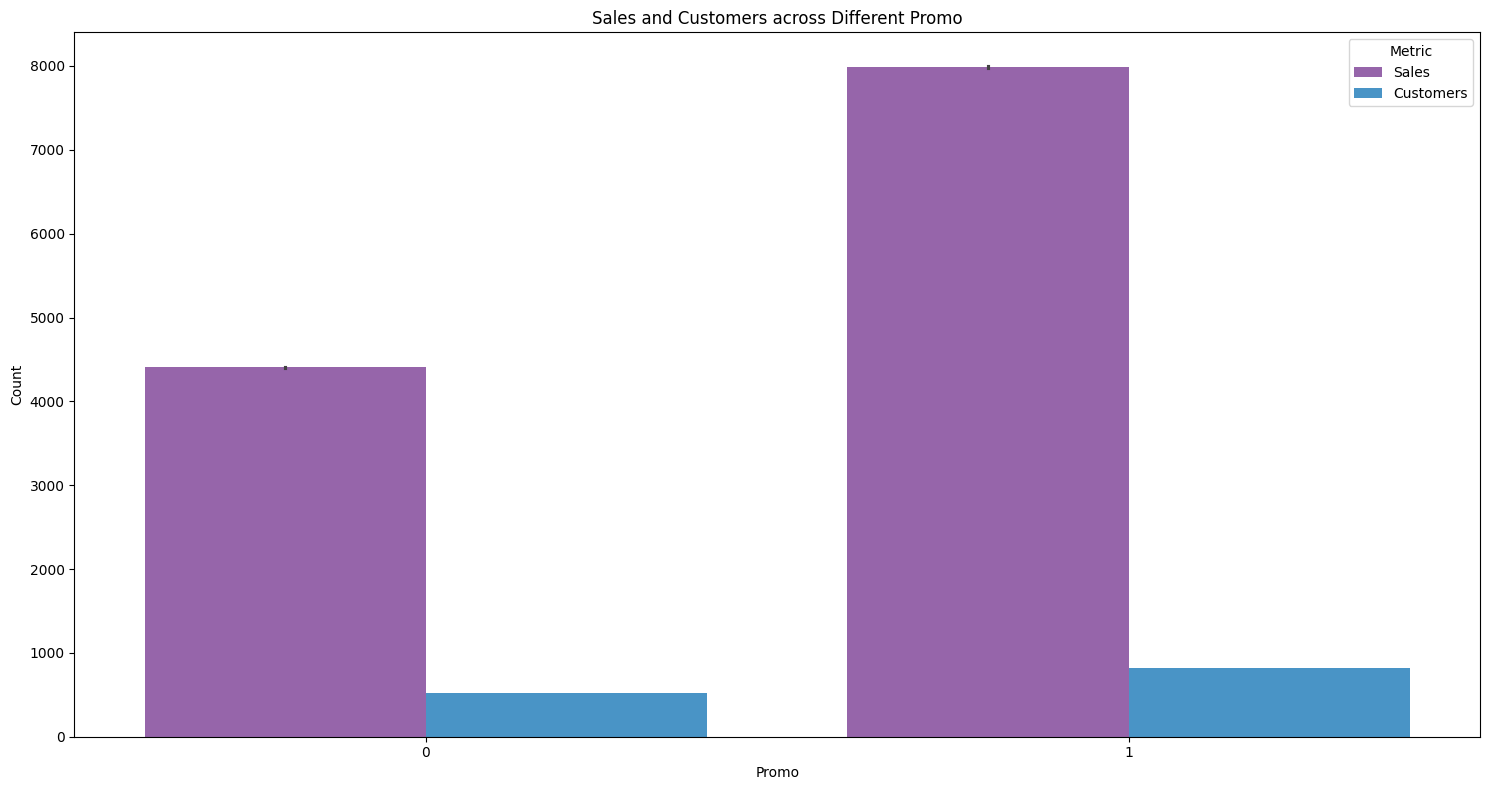

In [ ]:
# Use only two colors from the flatui palette
flatui = ["#9b59b6", "#3498db"]

# Create the figure
fig, ax = plt.subplots(figsize=(15, 8))

# Melt the DataFrame to have a long format for grouped bar plots
melted_df = df.melt(id_vars='Promo', value_vars=['Sales', 'Customers'], var_name='Metric', value_name='Value')

# Create the grouped barplot
sns.barplot(
    x='Promo',
    y='Value',
    hue='Metric',  # Differentiate between Sales and Customers
    data=melted_df,
    palette=flatui,
    ax=ax
)

# Set titles and labels
ax.set_title('Sales and Customers across Different Promo')
ax.set_xlabel('Promo')
ax.set_ylabel('Count')
plt.legend(title='Metric')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

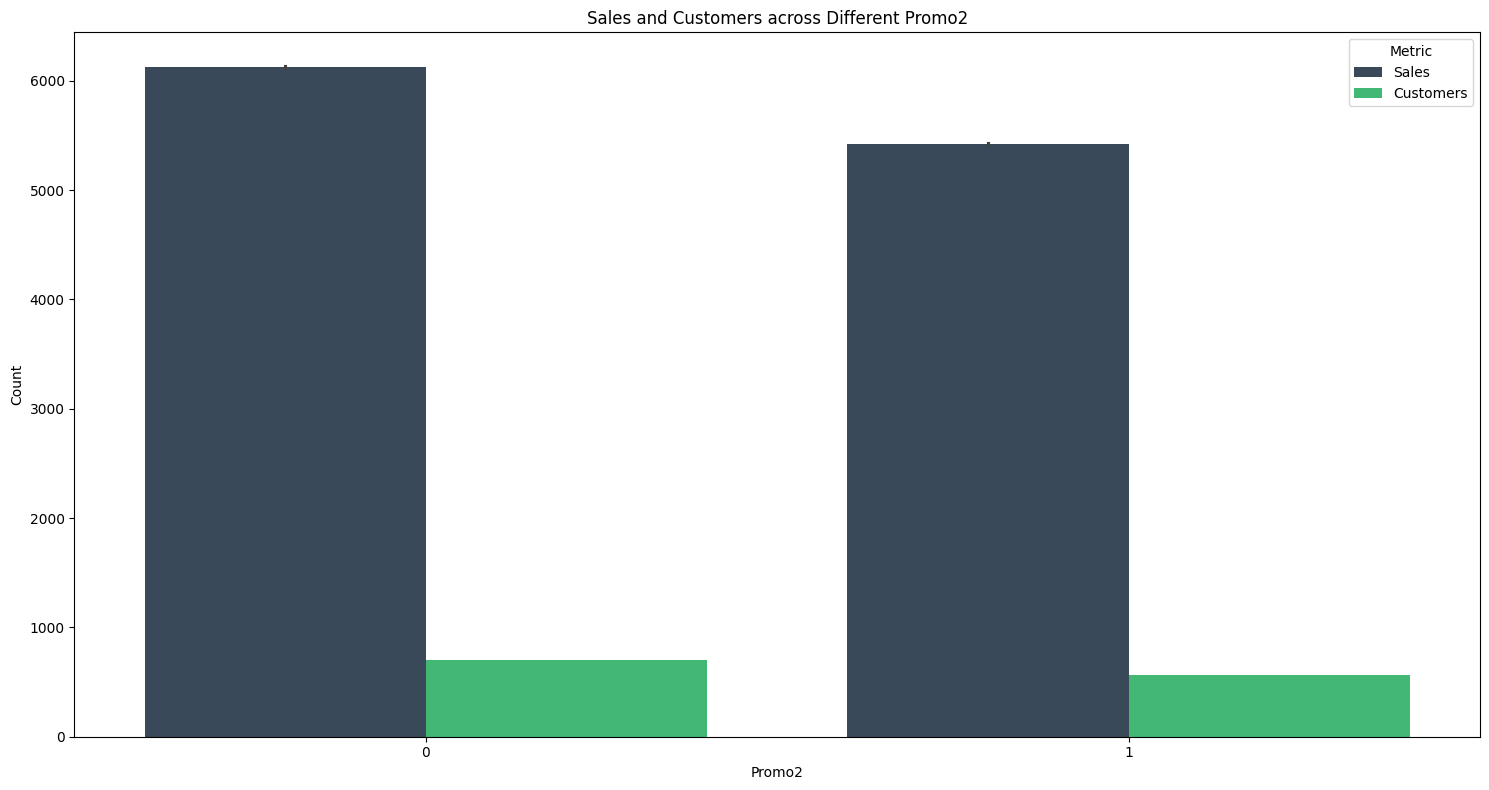

In [ ]:
# Define the palette for two categories
flatui = ["#34495e", "#2ecc71"]

# Create the figure
fig, ax = plt.subplots(figsize=(15, 8))

# Melt the DataFrame to have a long format for grouped bar plots
melted_df = df.melt(id_vars='Promo2', value_vars=['Sales', 'Customers'], var_name='Metric', value_name='Value')

# Create the grouped barplot
sns.barplot(
    x='Promo2',
    y='Value',
    hue='Metric',  # Differentiate between Sales and Customers
    data=melted_df,
    palette=flatui,
    ax=ax
)

# Set titles and labels
ax.set_title('Sales and Customers across Different Promo2')
ax.set_xlabel('Promo2')
ax.set_ylabel('Count')
plt.legend(title='Metric')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

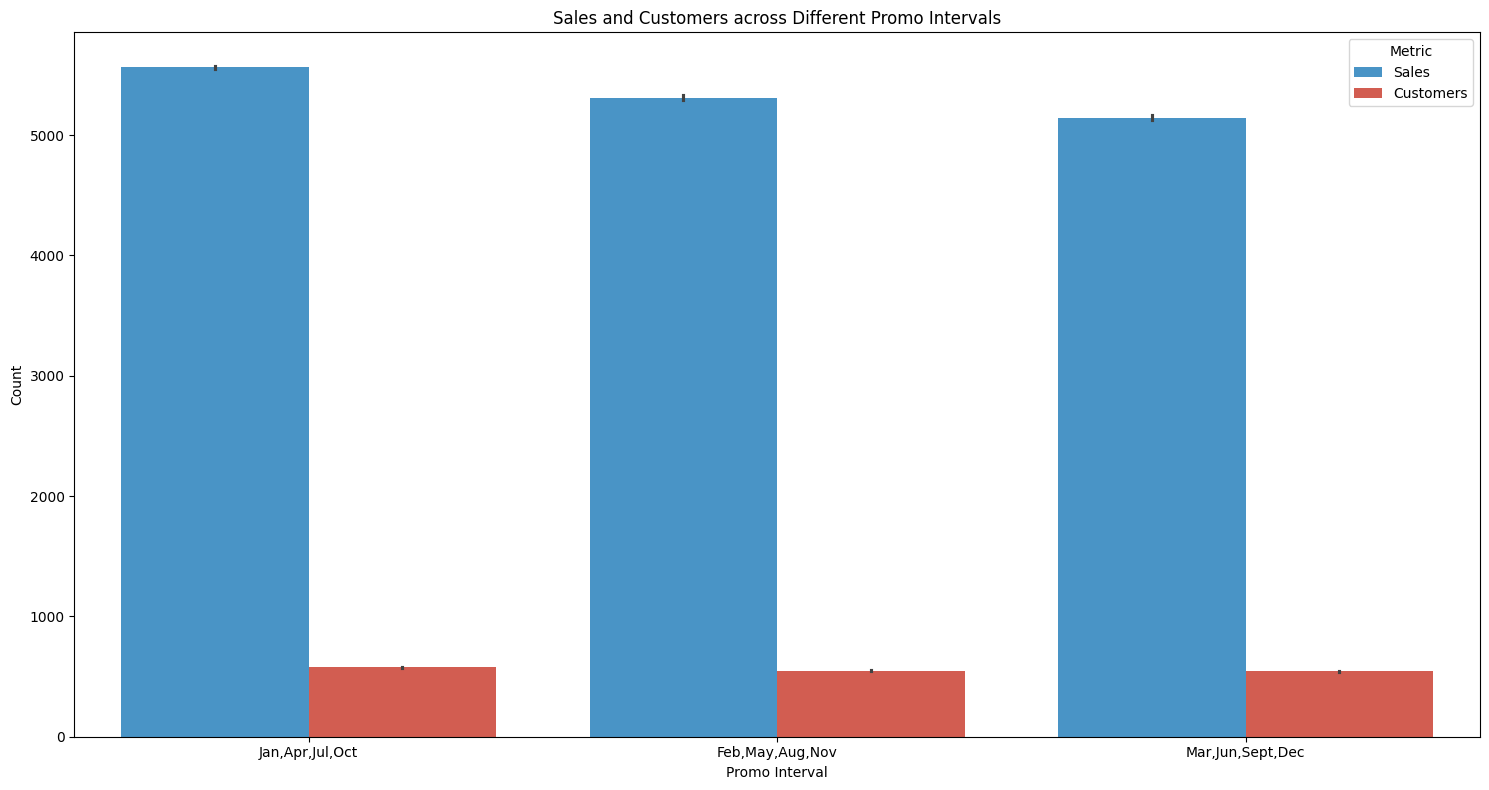

In [ ]:
# Define a simplified color palette for two metrics
flatui = ["#3498db", "#e74c3c"]  # Two colors for Sales and Customers

# Create the figure
fig, ax = plt.subplots(figsize=(15, 8))

# Mask for values with Promo2
mask = (df["Promo2"] != 0)

# Melt the DataFrame to have a long format for grouped bar plots
melted_df = df[mask].melt(id_vars='PromoInterval', value_vars=['Sales', 'Customers'], var_name='Metric', value_name='Value')

# Create the grouped barplot
sns.barplot(
    x='PromoInterval',
    y='Value',
    hue='Metric',  # Differentiate between Sales and Customers
    data=melted_df,
    palette=flatui,
    ax=ax
)

# Set titles and labels
ax.set_title('Sales and Customers across Different Promo Intervals')
ax.set_xlabel('Promo Interval')
ax.set_ylabel('Count')
plt.legend(title='Metric')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

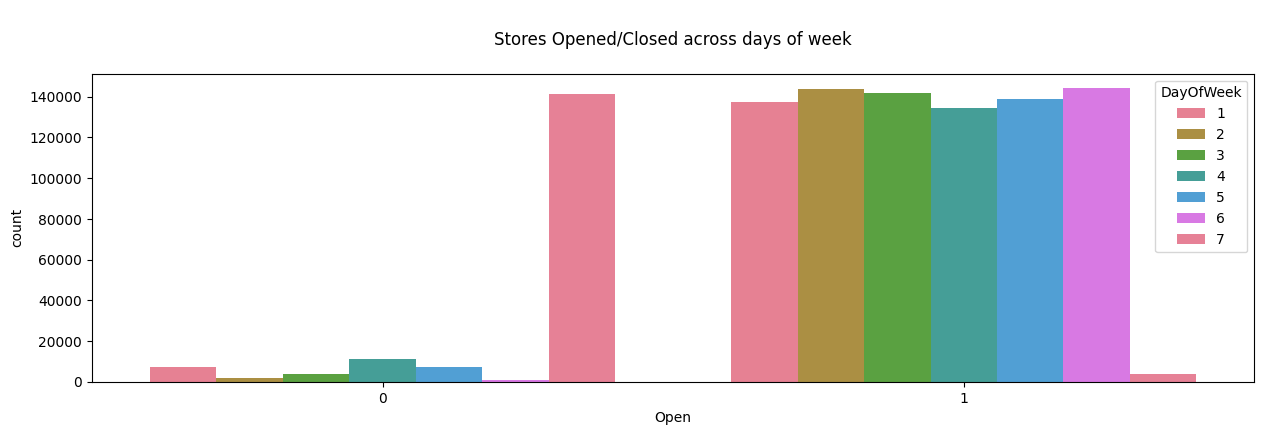

In [ ]:
fig, (axis1) = plt.subplots(1,1,figsize=(15,4))
sns.countplot(x='Open',hue='DayOfWeek', data=df,palette="husl", ax=axis1).set_title('\nStores Opened/Closed across days of week\n')
plt.show()

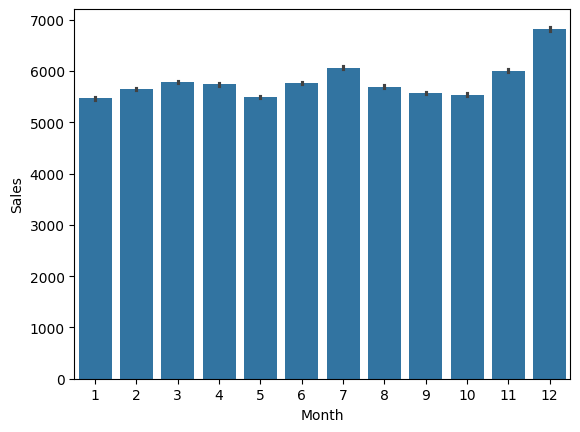

In [ ]:
sns.barplot(x='Month', y='Sales', data=df)
plt.show()

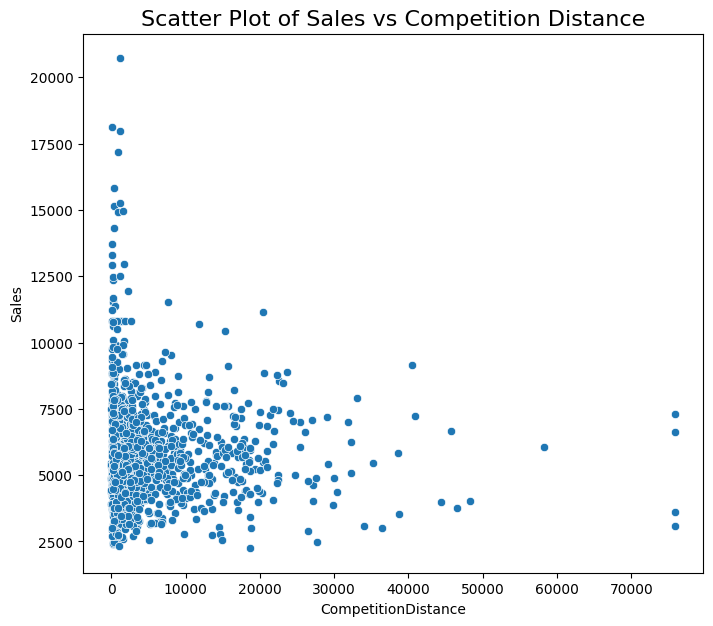

In [ ]:
# Grouping the DataFrame and calculating mean values
dist = df.groupby('Store').agg({
    'CompetitionDistance': 'mean',
    'Sales': 'mean',
    'Customers': 'mean'
})

# Create the scatter plot
plt.subplots(figsize=(8, 7))
sns.scatterplot(x='CompetitionDistance', y='Sales', data=dist)

# Add a title to the plot
plt.title('Scatter Plot of Sales vs Competition Distance', fontsize=16)

# Show the plot
plt.show()

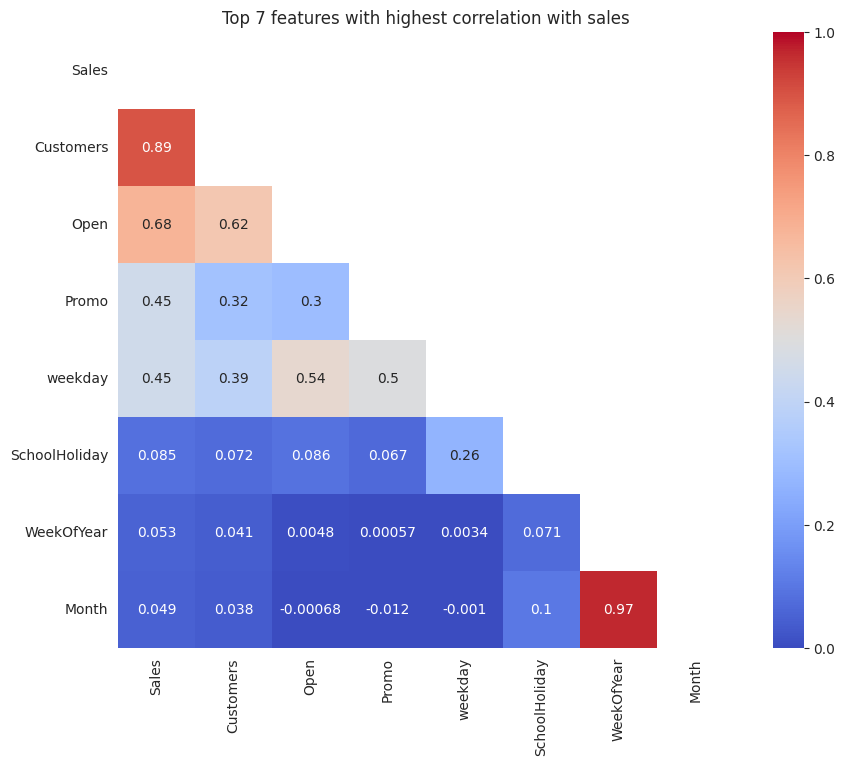

In [ ]:
## Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute correlation
f_most_correlated = numeric_df.corr().nlargest(8, 'Sales')['Sales'].index
f_correlation = numeric_df[f_most_correlated].corr()

# Generate a mask for the upper triangle
f_mask = np.zeros_like(f_correlation)
f_mask[np.triu_indices_from(f_mask)] = True
with sns.axes_style("white"):
    f_fig, f_ax = plt.subplots(figsize=(10, 8))
    f_ax = sns.heatmap(f_correlation, mask=f_mask, vmin=0, vmax=1, square=True,
                        annot=True, annot_kws={"size": 10}, cmap="coolwarm")
plt.title('Top 7 features with highest correlation with sales')
plt.show()

## Filtering Data and Answering Business Questions

Distribution of promotion in the training and test datasets

In [ ]:
# reading test data
test_df = pd.read_csv('/content/drive/My Drive/data/rossmann-store-sales_data/test.csv')
test_df.head(4)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0


In [25]:
# reading test data
train_df = pd.read_csv("/content/drive/My Drive/data/rossmann-store-sales_data/train.csv")
train_df.head(4)

<ipython-input-25-577476630a70>:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv("/content/drive/My Drive/data/rossmann-store-sales_data/train.csv")


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1


In [34]:
# Ensure the 'Date' column is in datetime format
train_df['Date'] = pd.to_datetime(train_df['Date'])

# Get the start and end dates
start_date = train_df['Date'].min()
end_date = train_df['Date'].max()

print(f"Start Date: {start_date}")
print(f"End Date: {end_date}")

Start Date: 2013-01-01 00:00:00
End Date: 2015-07-31 00:00:00


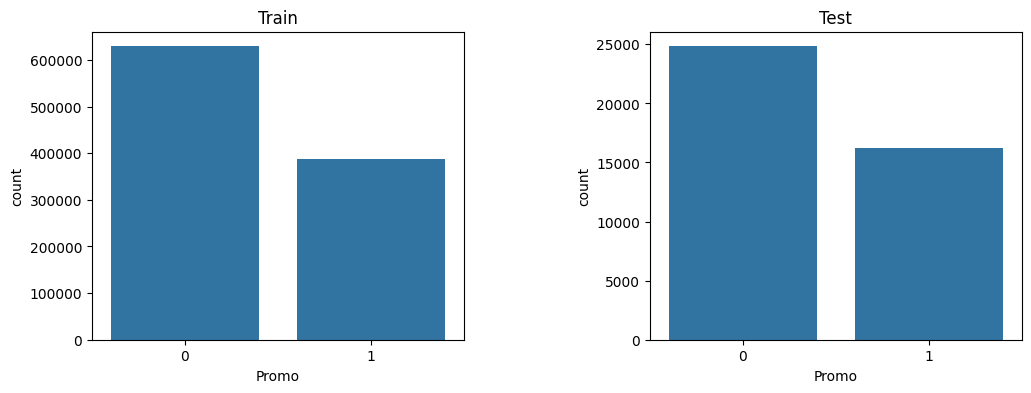

In [26]:
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(12, 4))
ax[0].set_title("Train")
sns.countplot(x='Promo', data=train_df, ax=ax[0])
ax[1].set_title("Test")
sns.countplot(x='Promo', data=test_df, ax=ax[1])
fig.subplots_adjust(wspace=0.5)
fig.show()

## Monthly sales trend per store type

In [27]:
store_type_a = df[df.StoreType == 'a']
store_type_b = df[df.StoreType == 'b']
store_type_c = df[df.StoreType == 'c']
store_type_d = df[df.StoreType == 'd']

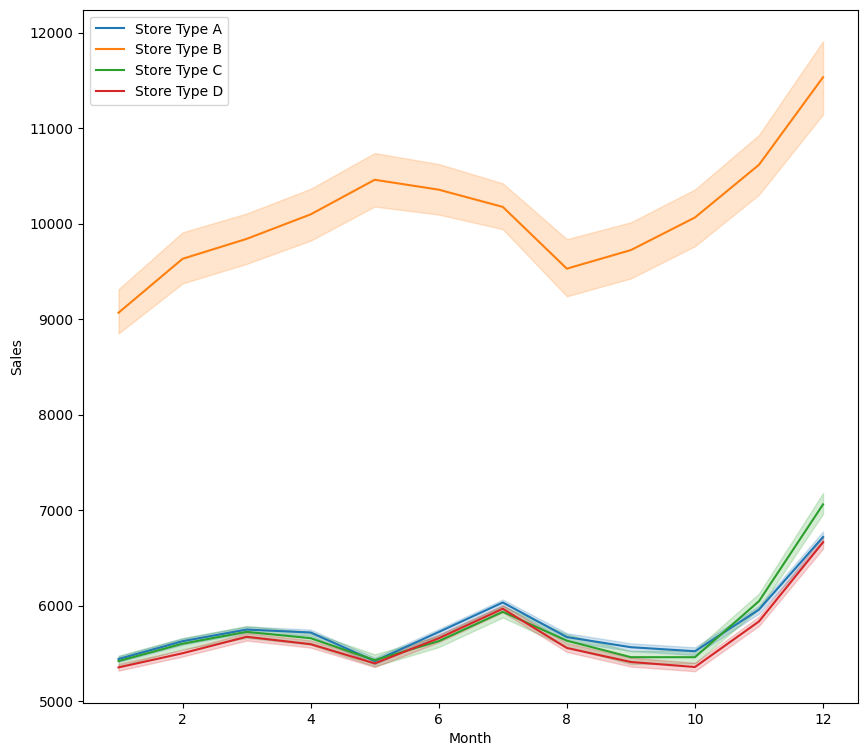

In [28]:
plt.subplots(figsize = (10, 9))
sns.lineplot(x = store_type_a.Month, y = store_type_a.Sales, label="Store Type A")
sns.lineplot(x = store_type_b.Month, y = store_type_b.Sales, label="Store Type B")
sns.lineplot(x = store_type_c.Month, y = store_type_c.Sales, label="Store Type C")
sns.lineplot(x = store_type_d.Month, y = store_type_d.Sales, label="Store Type D")
plt.show()

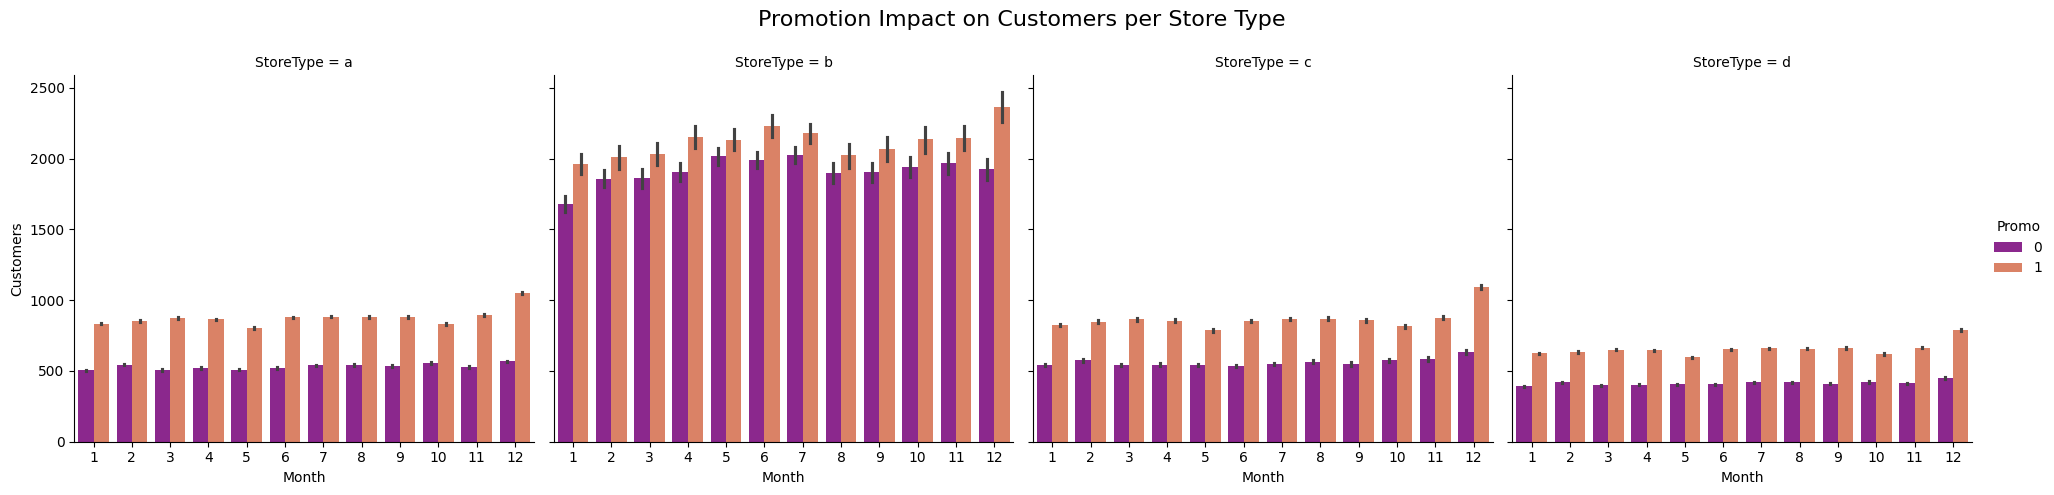

In [30]:
# Create the catplot
g = sns.catplot(
    data=df,
    x='Month',
    y='Customers',
    col='StoreType',  # Create separate plots for each store type
    palette='plasma',
    hue='Promo',
    col_order=['a', 'b', 'c', 'd'],
    kind='bar'  # Use 'bar' for a barplot or 'point' for a point plot
)

# Set the title for the entire figure
g.fig.suptitle('Promotion Impact on Customers per Store Type', fontsize=16)
g.fig.subplots_adjust(top=0.85)  # Adjust the top to make space for the title

# Show the plot
plt.show()

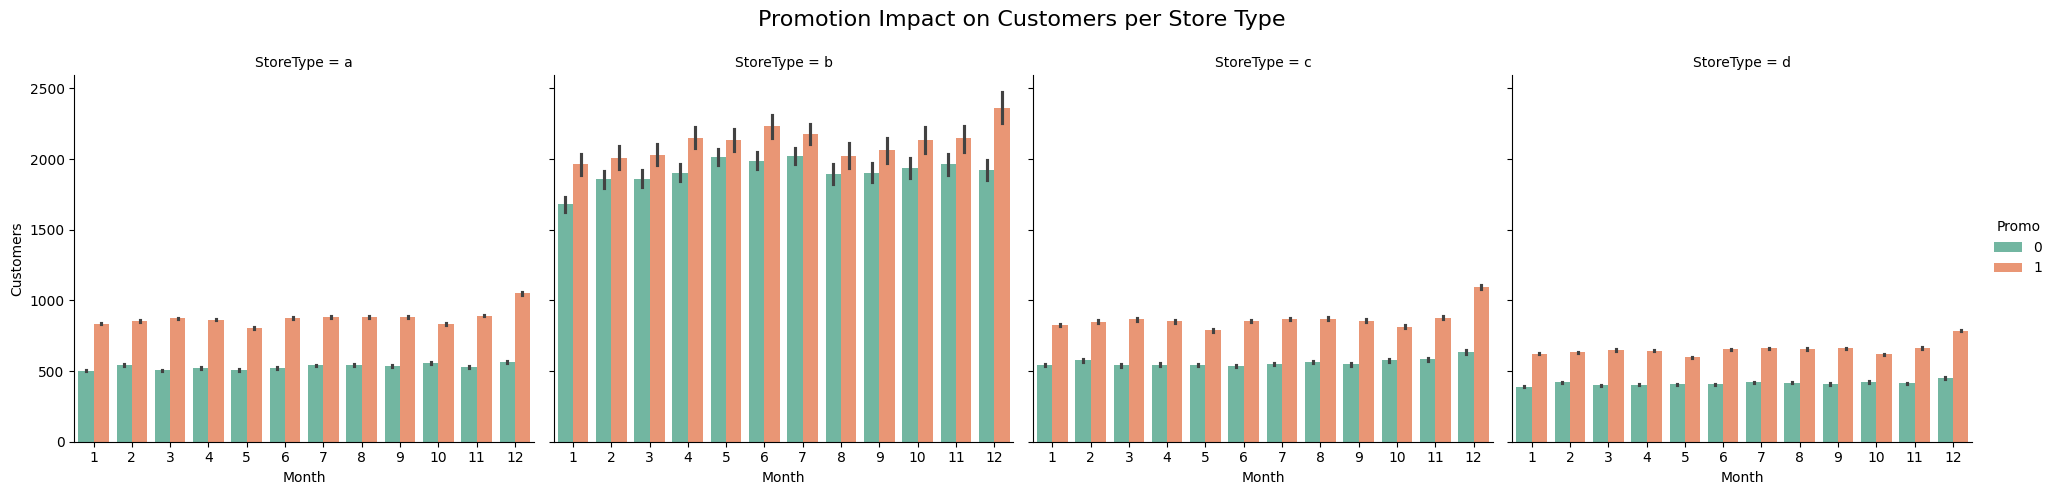

In [31]:
#Promotion Impact on Customers per Store Type
g = sns.catplot(
    data=df,
    x='Month',
    y='Customers',
    col='StoreType',  # Create separate plots for each store type
    palette='Set2',   # Specify a different color palette for better distinction
    hue='Promo',
    col_order=['a', 'b', 'c', 'd'],
    kind='bar'  # Use 'bar' for a barplot
)

# Set the title for the entire figure
g.fig.suptitle('Promotion Impact on Customers per Store Type', fontsize=16)
g.fig.subplots_adjust(top=0.85)  # Adjust the top to make space for the title

# Show the plot
plt.show()

## Sales before, after and during Christmas

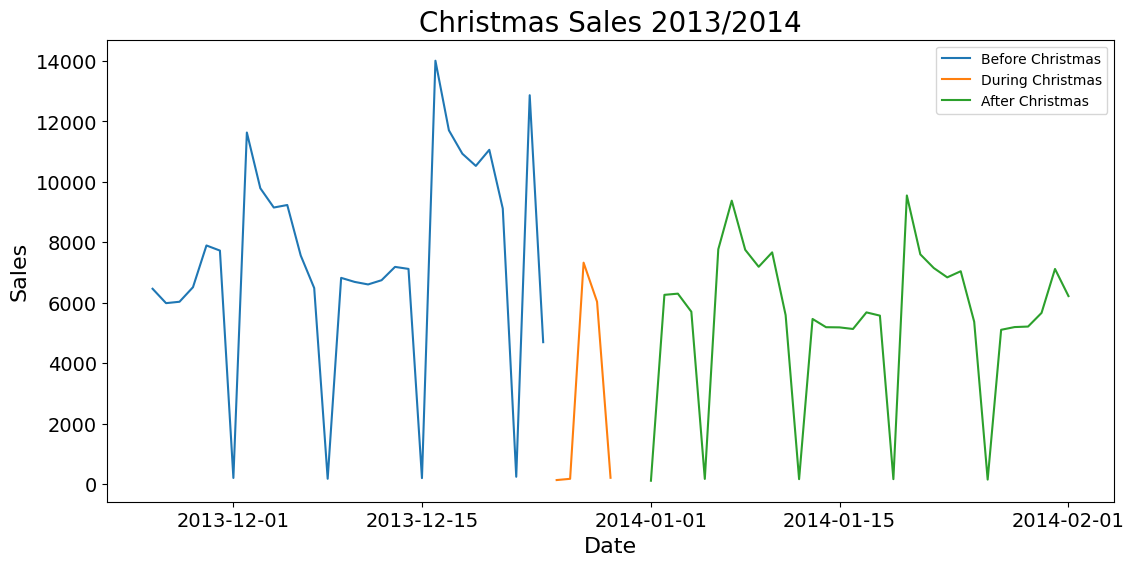

In [33]:
# Convert the 'Date' column to datetime if it isn't already
train_df['Date'] = pd.to_datetime(train_df['Date'])

# Define date ranges for different periods
before_xmas_start = pd.to_datetime("2013-11-25")
before_xmas_end = pd.to_datetime("2013-12-25")
during_xmas_start = pd.to_datetime("2013-12-25")
during_xmas_end = pd.to_datetime("2013-12-30")
after_xmas_start = pd.to_datetime("2014-01-01")
after_xmas_end = pd.to_datetime("2014-02-02")

# Group by Date and calculate mean Sales for each period
before_xmass = (train_df[(train_df["Date"] >= before_xmas_start) & (train_df["Date"] < before_xmas_end)]
                 .groupby("Date")["Sales"].mean())

during_xmass = (train_df[(train_df["Date"] >= during_xmas_start) & (train_df["Date"] < during_xmas_end)]
                 .groupby("Date")["Sales"].mean())

after_xmass = (train_df[(train_df["Date"] >= after_xmas_start) & (train_df["Date"] < after_xmas_end)]
                .groupby("Date")["Sales"].mean())

# Create the plot
plt.figure(figsize=(13, 6))

# Plot each period's sales
sns.lineplot(x=before_xmass.index, y=before_xmass.values, label='Before Christmas')
sns.lineplot(x=during_xmass.index, y=during_xmass.values, label='During Christmas')
sns.lineplot(x=after_xmass.index, y=after_xmass.values, label='After Christmas')

# Set plot titles and labels
plt.title("Christmas Sales 2013/2014", fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Date", fontsize=16)
plt.ylabel("Sales", fontsize=16)

# Show the plot
plt.show()